<a href="https://colab.research.google.com/github/santhoshsrivi/study/blob/main/my_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alagusantosh","key":"134ca1776e74692493140f151cb2885f"}'}

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c playground-series-s3e19

playground-series-s3e19.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
! unzip /content/playground-series-s3e19.zip

Archive:  /content/playground-series-s3e19.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('train.csv')

In [15]:
data.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [16]:
data.shape

(136950, 6)

In [17]:
data.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,136950.0,68474.500000,39534.204020,0.0,34237.25,68474.5,102711.75,136949.0
num_sold,136950.0,165.522636,183.691575,2.0,46.00,98.0,184.00,1380.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


**EDA**

<ipython-input-20-7e927f4f74ef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['num_sold'],kde=True)


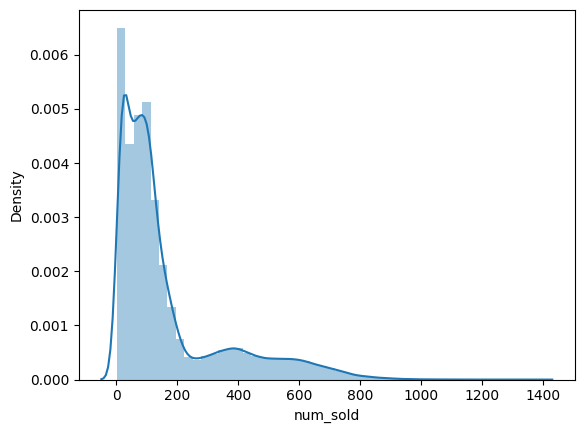

In [20]:
sns.distplot(data['num_sold'],kde=True)
plt.show()

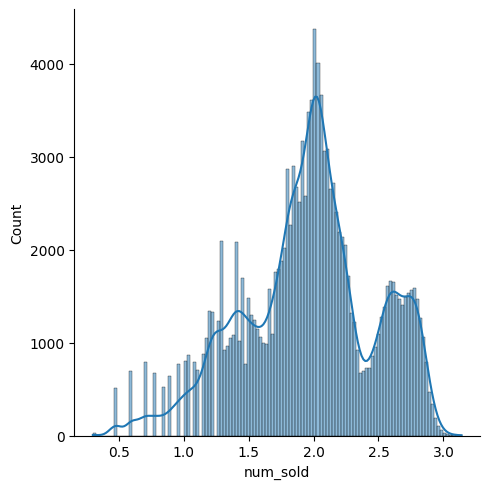

In [21]:
log_trans = sns.displot(np.log10(data['num_sold']),kde=True) #skewness is corrected using log
log_trans

In [22]:
data.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [23]:
data.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [24]:
data.dtypes

id           int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [25]:
sold = data['num_sold'].groupby(data['country']).sum().sort_values(ascending=True)
sold

country
Argentina    1683244
Estonia      3577319
Spain        4380862
Japan        6013786
Canada       7013114
Name: num_sold, dtype: int64

Text(0.5, 0, 'Product')

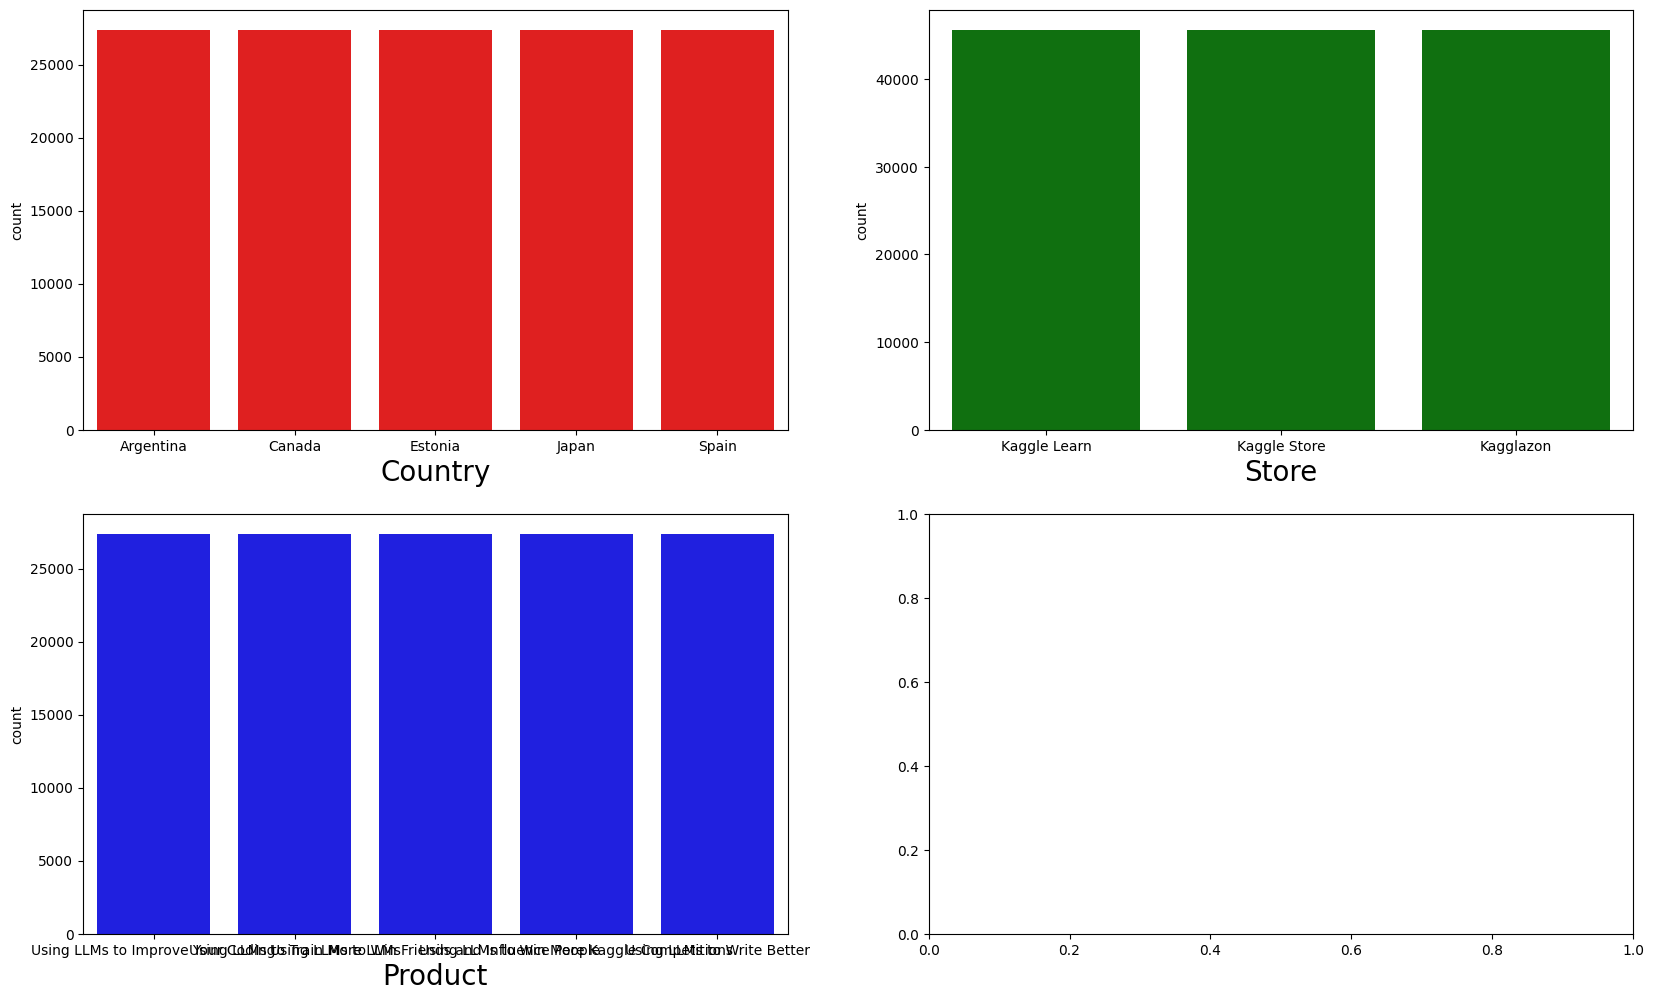

In [26]:
f, axes = plt.subplots(2, 2, figsize=(20, 12))
country = sns.countplot(x='country', data=data, color="red", ax=axes[0,0])
country.set_xlabel("Country",fontsize=20)

store = sns.countplot(x='store',data=data, color='green', ax = axes[0,1])
store.set_xlabel("Store",fontsize=20)

product = sns.countplot(x='product', data=data, color='blue', ax = axes[1,0])
product.set_xlabel("Product",fontsize=20)


<Axes: xlabel='country', ylabel='num_sold'>

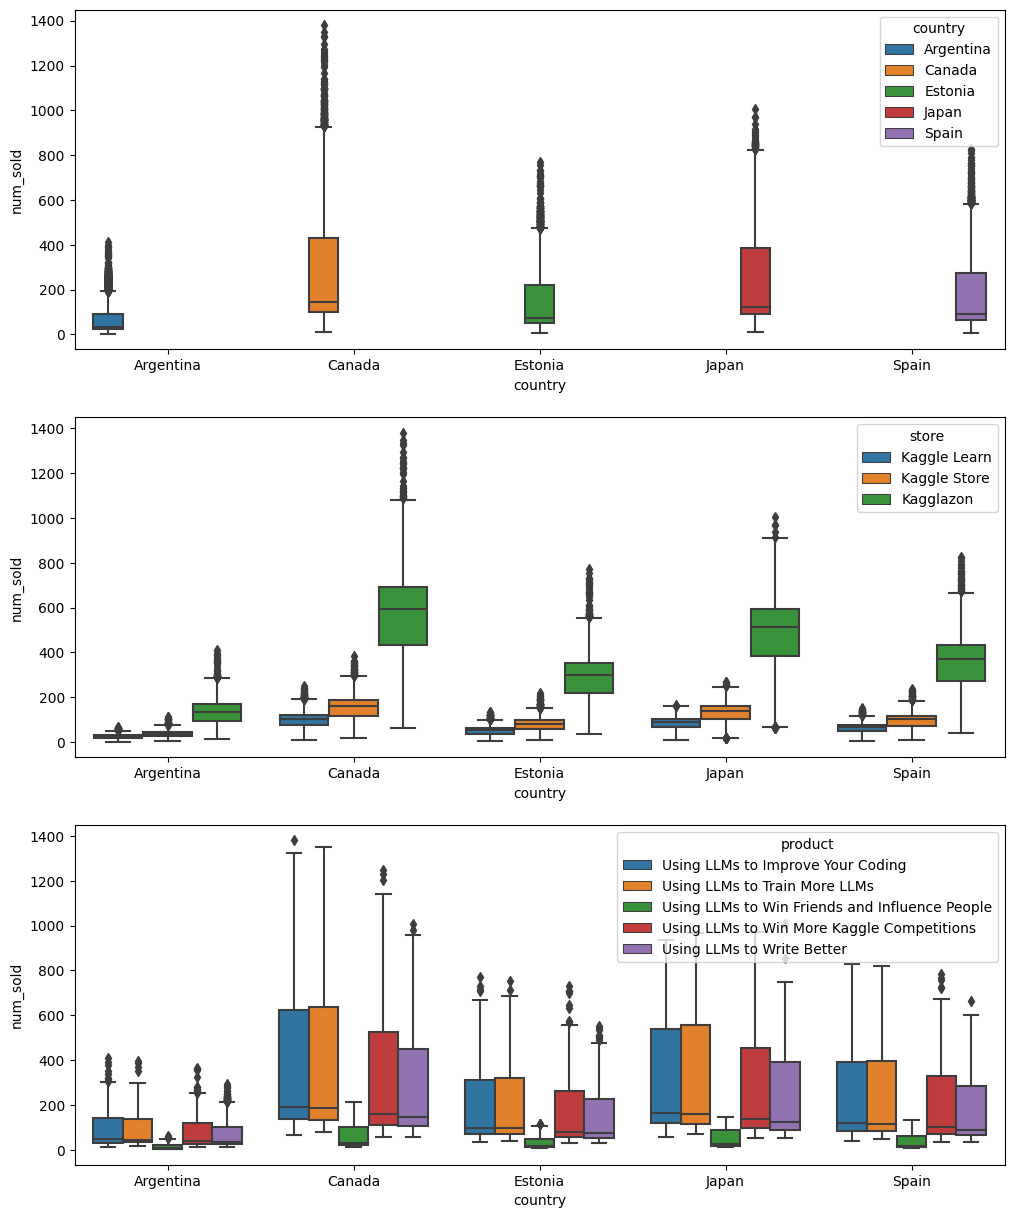

In [27]:
f, axes = plt.subplots(3, 1, figsize=(12, 15))
sns.boxplot(x='country', y='num_sold', hue='country', data=data, ax=axes[0])

sns.boxplot(x='country', y='num_sold', hue='store', data=data, ax = axes[1])

sns.boxplot(x='country', y='num_sold', hue='product', data=data, ax = axes[2])

In [28]:
data_copy = data.copy()
data_copy.country.value_counts()

Argentina    27390
Canada       27390
Estonia      27390
Japan        27390
Spain        27390
Name: country, dtype: int64

In [29]:
data_copy.store.value_counts()

Kaggle Learn    45650
Kaggle Store    45650
Kagglazon       45650
Name: store, dtype: int64

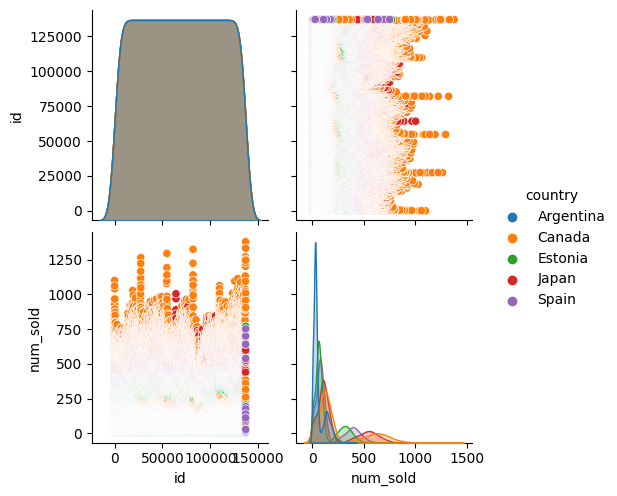

In [30]:
sns.pairplot(data, hue='country')

In [31]:
data['product'].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

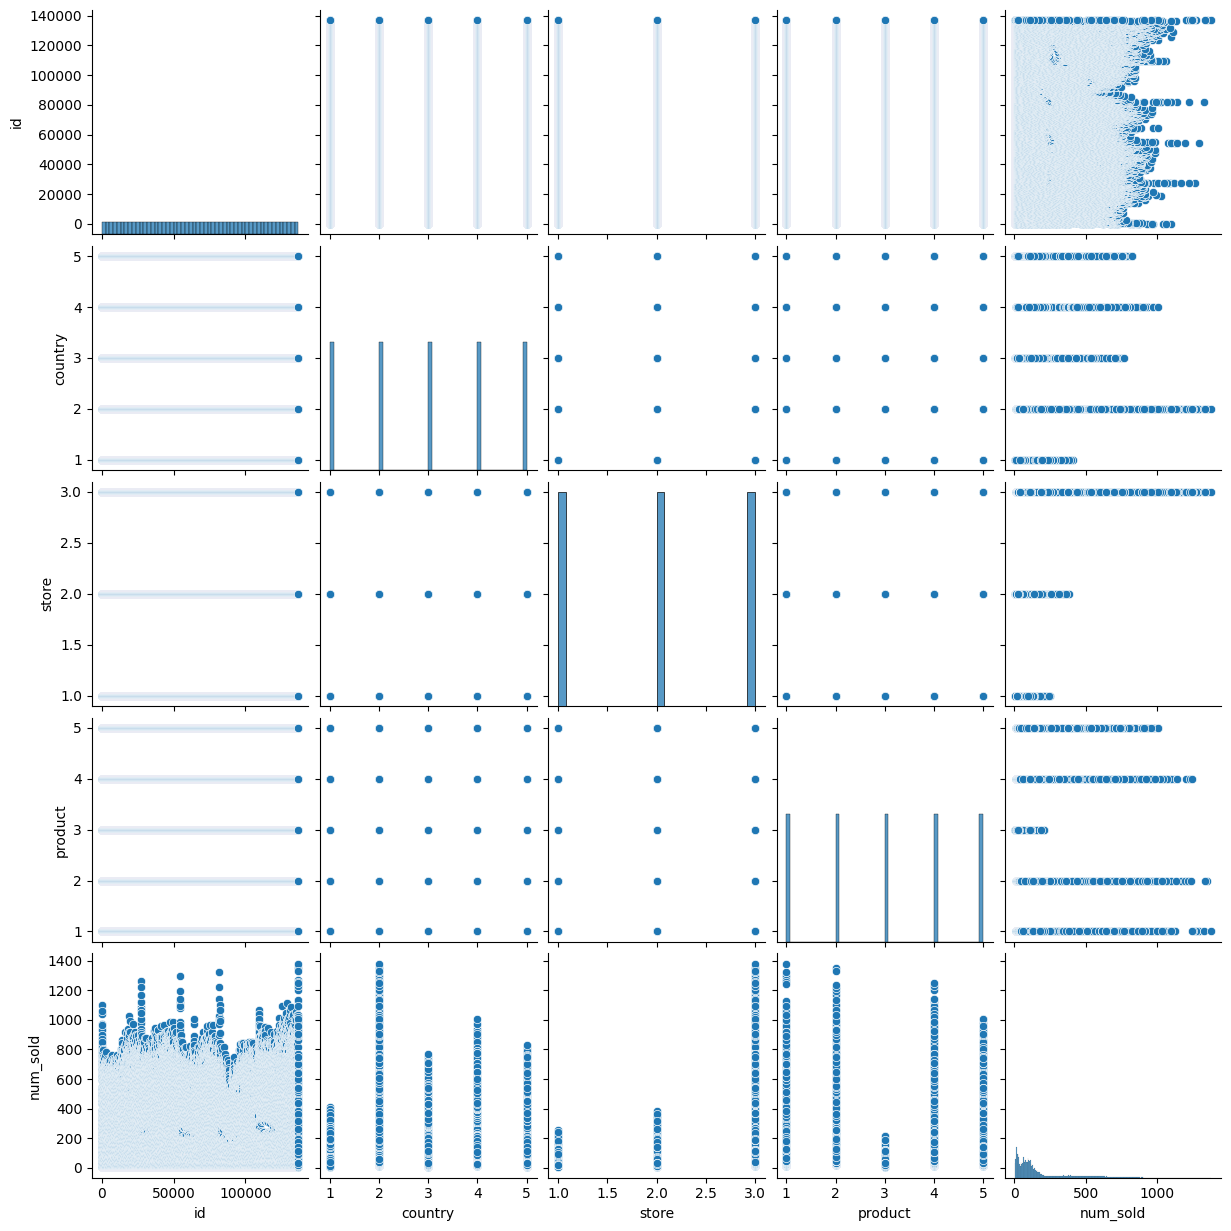

In [32]:
# Replace categorical columns with numerical equivalents

data_copy['country'] = data_copy['country'].replace({'Argentina': 1, 'Canada': 2, 'Estonia': 3, 'Japan': 4, 'Spain':5})
data_copy['store'] = data_copy['store'].replace({'Kaggle Learn': 1, 'Kaggle Store': 2, 'Kagglazon': 3})
data_copy['product'] = data_copy['product'].replace({'Using LLMs to Improve Your Coding': 1, 'Using LLMs to Train More LLMs': 2, 'Using LLMs to Win Friends and Influence People': 3, 'Using LLMs to Win More Kaggle Competitions': 4, 'Using LLMs to Write Better': 5})

# Pair plot with all the columns
sns.pairplot(data_copy)

In [33]:
data.dtypes

id           int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

<ipython-input-34-b4a83fc72c5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_copy.corr()


<Axes: >

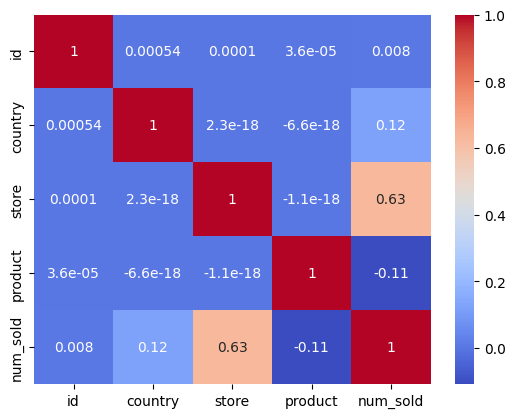

In [34]:
corr = data_copy.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = data_copy.drop(['num_sold'], axis = 1)
y = data_copy['num_sold']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
import statsmodels.api as sm

In [39]:
X_train.head()

,id,date,country,store,product
115128,115128,2021-03-16,1,1,4
3737,3737,2017-02-19,5,1,3
134723,134723,2021-12-02,2,2,4
25613,25613,2017-12-08,3,2,4
3700,3700,2017-02-19,2,3,1


In [40]:
X_train.drop('date',axis=1,inplace=True)

In [41]:
X_train

,id,country,store,product
115128,115128,1,1,4
3737,3737,5,1,3
134723,134723,2,2,4
25613,25613,3,2,4
3700,3700,2,3,1
...,...,...,...,...
41993,41993,5,2,4
97639,97639,5,1,5
95939,95939,1,3,5
117952,117952,4,2,3


In [42]:
X2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.995e+04
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:24:22   Log-Likelihood:            -6.9673e+05
No. Observations:              109560   AIC:                         1.393e+06
Df Residuals:                  109555   BIC:                         1.394e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -125.3741      1.839    -68.169      0.000    -128.979    -121.769
id          3.944e-05   1.07e-05      3.690      0.000    1.85e-05    6.04e-05
country       15.9014      0.299     53.218      0.000      15.316      16.487
store        141.3871      0.517    273.272      0.000     140.373     142.401
product      -14.0615      0.299    -47.076      0.000     -14.647     -13.476
==============================================================================
Omnibus:                    19383.520   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45444.370
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       5.424   Cond. No.                     3.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train, y_train)

LinearRegression()

In [46]:
X_test.drop('date',axis=1,inplace=True)

In [47]:
y_pred1 = lm.predict(X_test)

<ipython-input-48-c2c31b71efde>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-48-c2c31b71efde>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , a

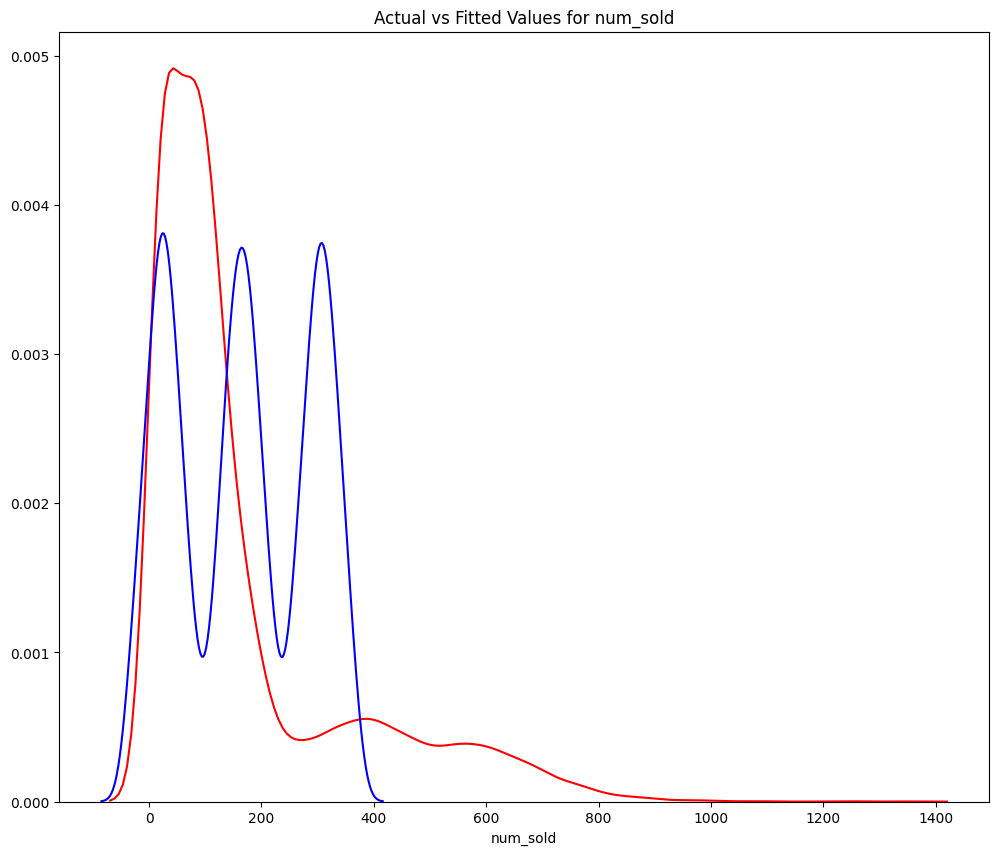

In [48]:
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for num_sold')
plt.xlabel('num_sold')
plt.ylabel('')
plt.show()
plt.close()

In [49]:
predicted1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predicted1.head()

,Actual,Predicted
78189,61,137.880917
82486,96,70.650551
58131,40,147.471478
97970,165,179.005778
82041,182,212.020127


**Lasso Regression Model**

In [50]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [51]:
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=101) #we’ll use the RepeatedKF
#define model
lasso_model = LassoCV(alphas=(0.1, 1.0, 10.0), cv=cv, n_jobs=-1)
#fit model
lasso_model.fit(X_train, y_train)

LassoCV(alphas=(0.1, 1.0, 10.0),
        cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=101),
        n_jobs=-1)

In [52]:
print(lasso_model.intercept_)
print(lasso_model.coef_)
print(lasso_model.score(X_test, y_test))

-125.07600396124056
[ 3.94495314e-05  1.58516475e+01  1.41237280e+02 -1.40113287e+01]
0.4235542244257895


In [53]:
y_pred2 = lasso_model.predict(X_test)

<ipython-input-54-5d93ef92f0f7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-54-5d93ef92f0f7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , a

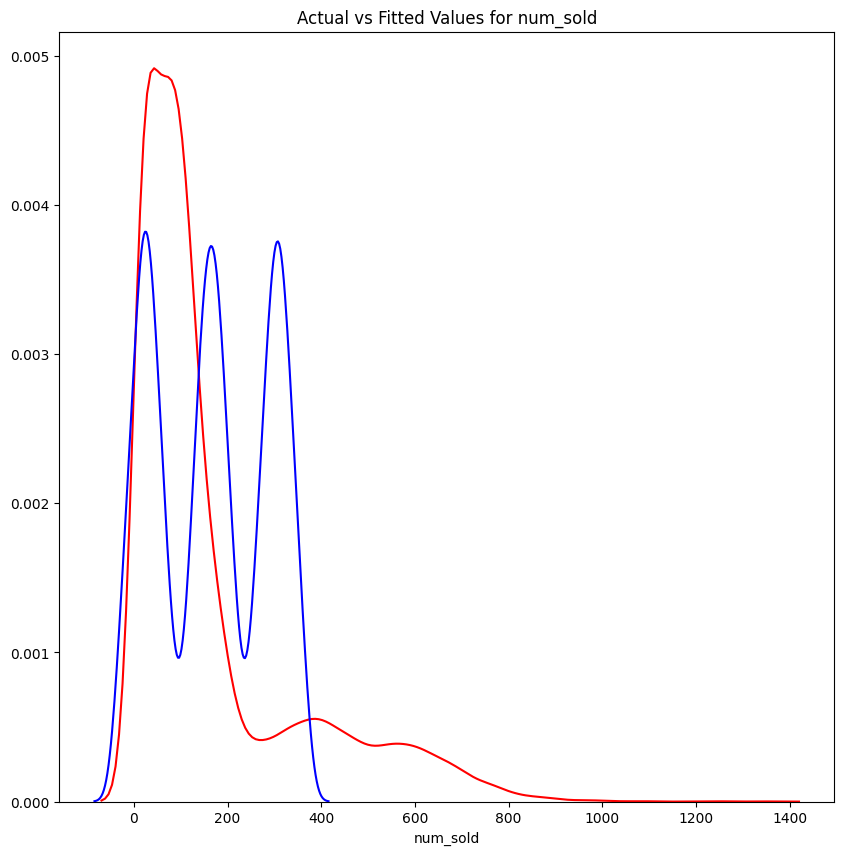

In [54]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for num_sold')
plt.xlabel('num_sold')
plt.ylabel('')
plt.show()
plt.close()

In [55]:
predicted2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predicted2.head()

,Actual,Predicted
78189,61,137.981375
82486,96,70.650890
58131,40,147.520787
97970,165,178.955393
82041,182,211.870615


**Ridge regression model**

In [56]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [57]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101)
rid_model = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=cv, scoring='neg_mean_absolute_error')
rid_model.fit(X_train, y_train)

RidgeCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=101),
        scoring='neg_mean_absolute_error')

In [58]:
print(rid_model.intercept_)
print(rid_model.coef_)
print(rid_model.score(X_test, y_test))

-125.33530778620471
[ 3.94442064e-05  1.59006974e+01  1.41367778e+02 -1.40608369e+01]
0.4235588248771709


In [59]:
#WE PREDICT OUR RIDGECV REGRESSION MODEL
y_pred3 = rid_model.predict(X_test)

<ipython-input-60-dd0b7dbb9a0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-60-dd0b7dbb9a0e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , a

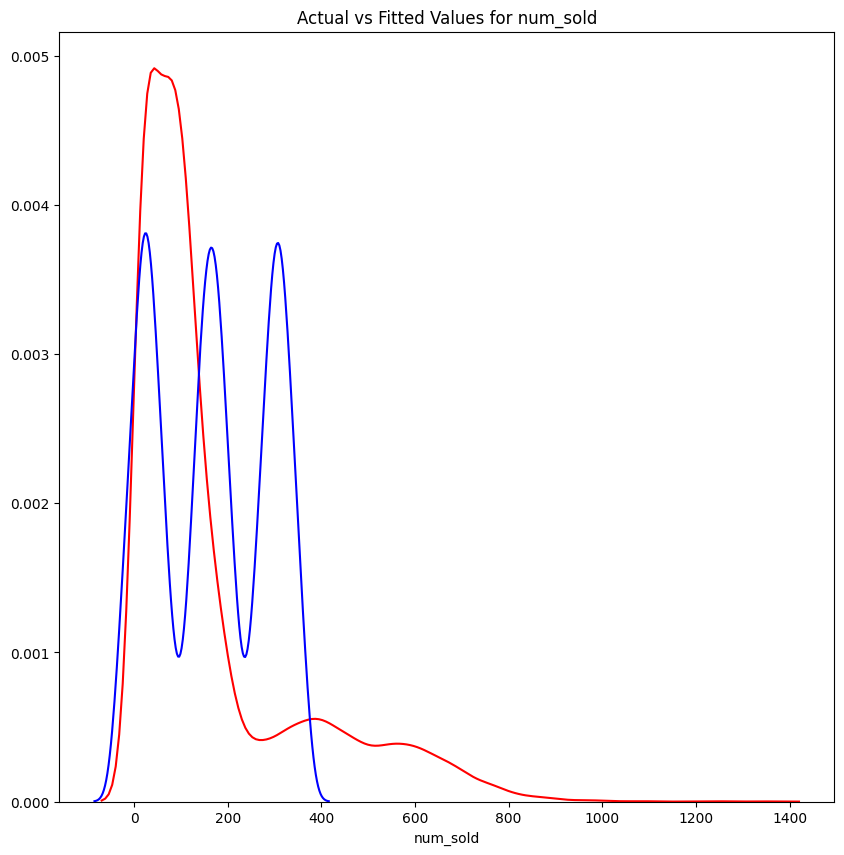

In [60]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for num_sold')
plt.xlabel('num_sold')
plt.ylabel('')
plt.show()
plt.close()

In [61]:
predicted3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
predicted3.head()

,Actual,Predicted
78189,61,137.882259
82486,96,70.667878
58131,40,147.472203
97970,165,179.005155
82041,182,212.018104


In [62]:
from sklearn.ensemble import RandomForestRegressor
Ran_reg = RandomForestRegressor(n_estimators = 100, criterion='squared_error', min_samples_split=2)
Ran_reg.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
print(Ran_reg.score(X_test, y_test))

0.9836638751856523


In [64]:
y_pred5 = Ran_reg.predict(X_test)

<ipython-input-65-17011f1fb200>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-65-17011f1fb200>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred5, hist=False, color="b", label="Fitted Values" , a

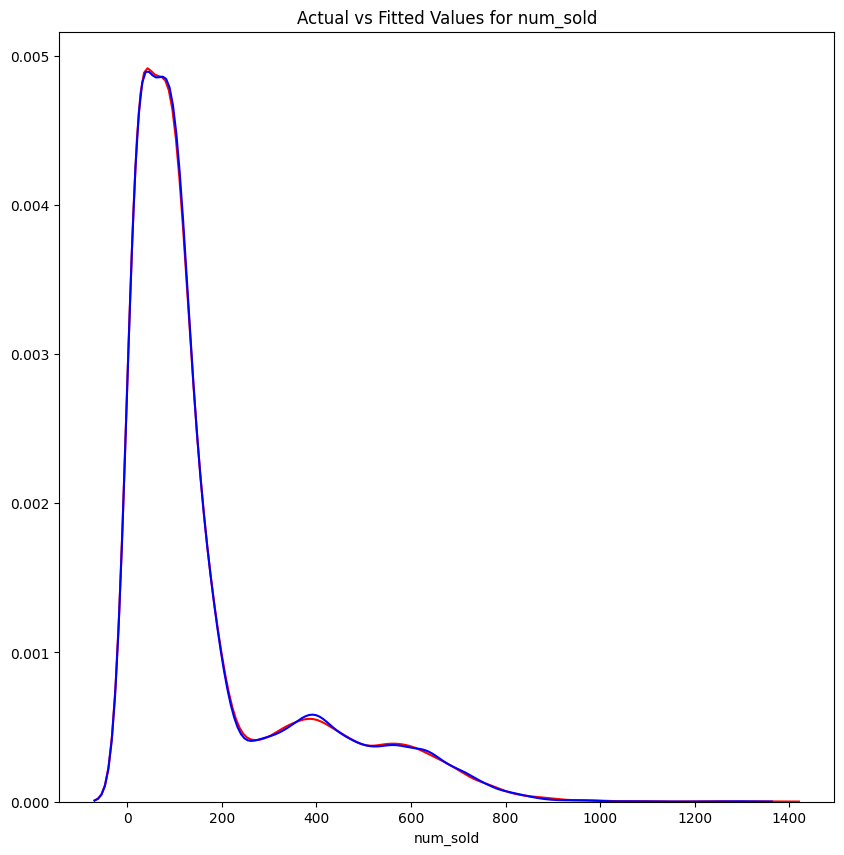

In [65]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred5, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for num_sold')
plt.xlabel('num_sold')
plt.ylabel('')
plt.show()
plt.close()

In [66]:
predicted5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5})
predicted5.head()

,Actual,Predicted
78189,61,58.94
82486,96,78.43
58131,40,37.23
97970,165,174.25
82041,182,208.41


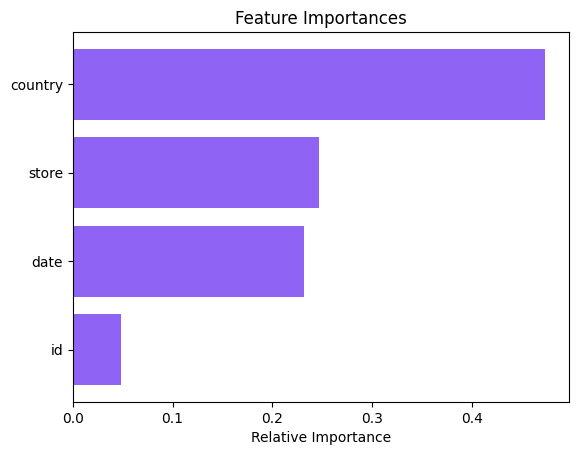

In [67]:
features = X.columns
importances = Ran_reg.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [68]:
test_given = pd.read_csv('test.csv')

In [69]:
test_given.head()

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [70]:
# Replace categorical columns with numerical equivalents

test_given['country'] = test_given['country'].replace({'Argentina': 1, 'Canada': 2, 'Estonia': 3, 'Japan': 4, 'Spain':5})
test_given['store'] = test_given['store'].replace({'Kaggle Learn': 1, 'Kaggle Store': 2, 'Kagglazon': 3})
test_given['product'] = test_given['product'].replace({'Using LLMs to Improve Your Coding': 1, 'Using LLMs to Train More LLMs': 2, 'Using LLMs to Win Friends and Influence People': 3, 'Using LLMs to Win More Kaggle Competitions': 4, 'Using LLMs to Write Better': 5})


In [71]:
test_given.drop('date',axis=1,inplace=True)

In [72]:
pred_actual = Ran_reg.predict(test_given)

In [73]:
my_pred = pd.DataFrame({'id': test_given['id'], 'num_sold': pred_actual})

In [74]:
my_pred.head()

,id,num_sold
0,136950,45.30
1,136951,45.41
2,136952,6.27
3,136953,41.78
4,136954,33.13


In [75]:
my_pred.to_csv("submission.csv")

In [77]:
submission = pd.read_csv('sample_submission.csv')

In [78]:
submission.head()

,id,num_sold
0,136950,100
1,136951,100
2,136952,100
3,136953,100
4,136954,100
